# Prédiction du prix d'un maison

In [101]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [102]:
data = pd.read_csv(r'C:\Users\IDEAPAD\Documents\GitHub\GoMyCode\checkpoint 4\resources\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [104]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [105]:
data.isnull().sum()#Aucune Valeur Nulle

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [106]:
data.drop(['id', 'date'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Text(0.5, 0, 'Nombre de Chambres')

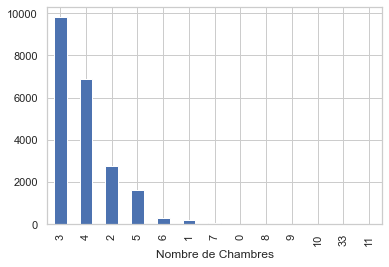

In [107]:
#Quelle piaule est la plus vendu en fonction de son nombre de chambre
sns.set_theme(style='whitegrid')
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Nombre de Chambres')

#Les maisons ayant 3 et 4 chmabres sont les plus vendues

<AxesSubplot:xlabel='lat', ylabel='long'>

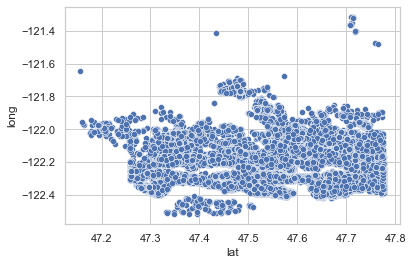

In [108]:
#Repartition des maisons sur le territoire
sns.scatterplot(x='lat', y='long', data=data)

#Lat[47,65 ; 47,8] et long[-122,0 ; -122,4] : Fort taux de vente de maison à ces coordonnées

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

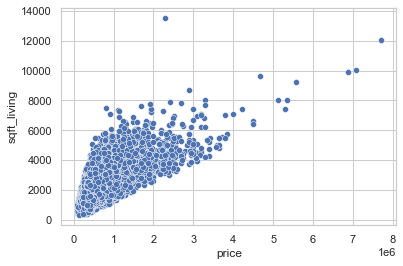

In [109]:
#Price et Sqft_living
sns.scatterplot(x='price', y='sqft_living', data=data)

<AxesSubplot:xlabel='price', ylabel='long'>

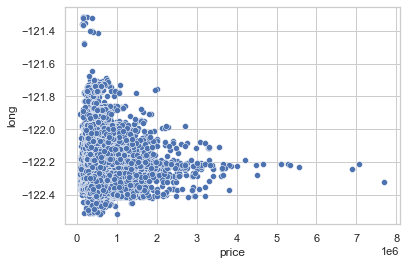

In [110]:
#Price et Long
sns.scatterplot(x='price', y='long', data=data)#Prix des maisons en termes de Longitude

<AxesSubplot:xlabel='price', ylabel='lat'>

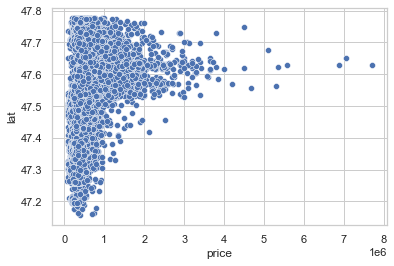

In [111]:
#Price et Lat
sns.scatterplot(x='price', y='lat', data=data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

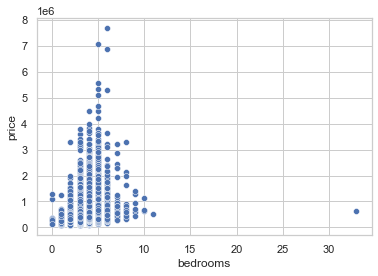

In [147]:
sns.scatterplot(x='bedrooms', y='price', data=data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

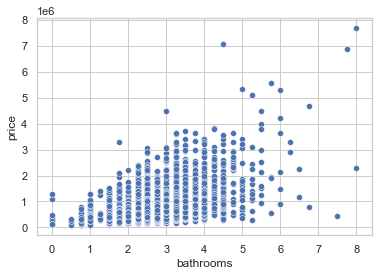

In [148]:
sns.scatterplot(x='bathrooms', y='price', data=data)#Salle de Bain

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

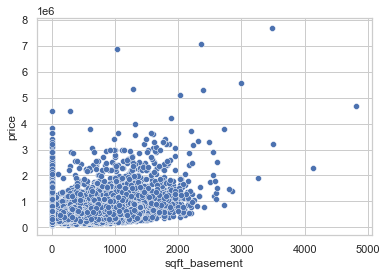

In [149]:
sns.scatterplot(x='sqft_basement', y='price', data=data)#Sous-Sol

<AxesSubplot:xlabel='yr_built', ylabel='price'>

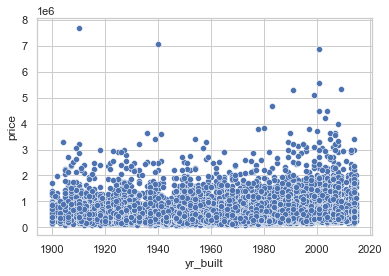

In [150]:
sns.scatterplot(data = data, x='yr_built', y='price')

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

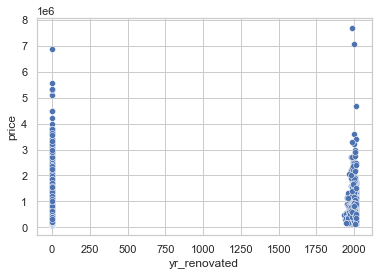

In [151]:
sns.scatterplot(data = data, x='yr_renovated', y='price')

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

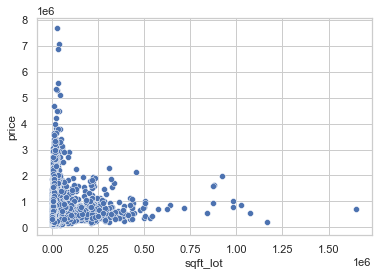

In [152]:
sns.scatterplot(x='sqft_lot', y='price', data=data)

# Régression Linéaire

R Squared : 0.4996528488387417


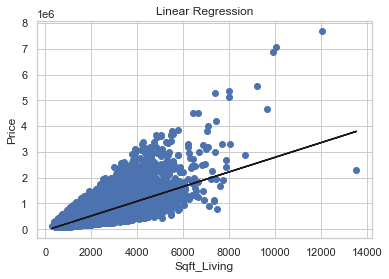

In [153]:
X = data['sqft_living'].values[:,np.newaxis]
Y = data['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=40)
reg =LinearRegression()
reg.fit(X_train, Y_train)#Entraînement du modèle
predict = reg.predict(X_test)#Test des performances du modèles
print(("R Squared : {}").format(metrics.r2_score(Y_test, predict)))


plt.scatter(X, Y, color="b")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft_Living")
plt.plot(X, reg.predict(X),color="k")
plt.show()

# Régression Multi-linéaire

In [154]:
X2 = data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long']]
Y2 = data['price'].values
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, train_size=0.35, random_state=40)
mreg = LinearRegression()
mreg.fit(X_train2, Y_train2)
mpredict = mreg.predict(X_test2)
print(("R Squared : {}").format(metrics.r2_score(Y_test2, mpredict)))

R Squared : 0.699163419321575


# Régression Polynomiale

In [155]:
X3 = data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long']]
Y3 = data['price'].values
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, train_size=0.35, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures()
X_train_fit = poly.fit_transform(X_train3) #transforming our input data
lg.fit(X_train_fit, Y_train3)
X_test_ = poly.fit_transform(X_test3)
predicted = lg.predict(X_test_)
print(("R Squared : {}").format(metrics.r2_score(Y_test3, predicted)))


R Squared : 0.8002637196995943
